In [1]:
from scratch.linear_algebra import sum_of_squares, dot

In [2]:
from collections import Counter
import math
from operator import add

In [3]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
import matplotlib.pyplot as plt

In [4]:
def make_friend_counts_histogram(plt):
    friend_counts = Counter(num_friends)
    xs = range(101)
    ys = [friend_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0,101,0,25])
    plt.title("Histogram of Friend Counts")
    plt.xlabel("# of friends")
    plt.ylabel("# of people")
    plt.show()

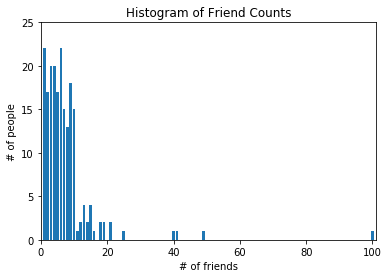

In [5]:
make_friend_counts_histogram(plt)

Unfortunately, this chart is still too difficult to slip into conversations.
So you start generating some statistics.
Probably the simplest statistic is simply the number of data points:

min, max, smallest, largest

In [6]:
num_points = len(num_friends) # 204
largest_value = max(num_friends) # 100
smallest_value = min(num_friends) # 1
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0] # 1
second_smallest_value = sorted_values[1] # 1
second_largest_value = sorted_values[-2] # 49
print("num_points", len(num_friends))
print("largest value", max(num_friends))
print("smallest value", min(num_friends))
print("second_smallest_value", sorted_values[1])
print("second_largest_value", sorted_values[-2] )

num_points 204
largest value 100.0
smallest value 1
second_smallest_value 1
second_largest_value 49


numpy version

In [7]:
import numpy as np
num_friends = np.array(num_friends)
num_points = num_friends.shape[0] # 204
largest_value = np.max(num_friends) # 100
smallest_value = np.min(num_friends) # 1
sorted_values = np.sort(num_friends)
smallest_value = sorted_values[0] # 1
second_smallest_value = sorted_values[1] # 1
second_largest_value = sorted_values[-2] # 49
print("num_points", len(num_friends))
print("largest value", max(num_friends))
print("smallest value", min(num_friends))
print("second_smallest_value", sorted_values[1])
print("second_largest_value", sorted_values[-2] )
num_friends = list(num_friends)

num_points 204
largest value 100.0
smallest value 1.0
second_smallest_value 1.0
second_largest_value 49.0


Central Tendencies

The median doesn’t depend on every value in your data.
For example, if you make the largest point larger (or the smallest point smaller), the middle points remain
unchanged.
the mean is very sensitive to outliers in our data.
If our friendliest user had 200 friends (instead of 100), then the mean would rise to 7.82, while the median
would stay the same
For example, the story is often told that in the mid-1980s, the major at the University of North Carolina with
the highest average starting salary was geography, mostly on account of NBA star (and outlier) Michael
Jordan.
A generalization of the median is the quantile, which represents the value less than which a certain
percentile of the data lies. (The median represents the value less than which 50% of the data lies.)
mode: most-common value

mean, median, quantile, mode

In [8]:
def mean(x):
    return sum(x) / len(x)
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
 # if odd, return the middle value
        return sorted_v[midpoint]
    else:
 # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
        if count == max_count]


In [9]:
print("mean(num_friends)", mean(num_friends))
print("median(num_friends)", median(num_friends))
print("quantile(num_friends, 0.10)", quantile(num_friends, 0.10))
print("quantile(num_friends, 0.25)", quantile(num_friends, 0.25))
print("quantile(num_friends, 0.75)", quantile(num_friends, 0.75))
print("quantile(num_friends, 0.90)", quantile(num_friends, 0.90))
print("mode(num_friends)", mode(num_friends))

mean(num_friends) 7.333333333333333
median(num_friends) 6.0
quantile(num_friends, 0.10) 1.0
quantile(num_friends, 0.25) 3.0
quantile(num_friends, 0.75) 9.0
quantile(num_friends, 0.90) 13.0
mode(num_friends) [6.0, 1.0]


numpy version


In [10]:
import numpy as np
# np.quantile is available from v1.16
# np.percentile uses percent instead of ratio
print("mean(num_friends)", np.mean(num_friends))
print("median(num_friends)", np.median(num_friends))
print("quantile(num_friends, 0.10)", np.percentile(num_friends, 10))
print("quantile(num_friends, 0.25)", np.percentile(num_friends, 25))
print("quantile(num_friends, 0.75)", np.percentile(num_friends, 75))
print("quantile(num_friends, 0.90)", np.percentile(num_friends, 90))
# mode using numpy will be a homework

mean(num_friends) 7.333333333333333
median(num_friends) 6.0
quantile(num_friends, 0.10) 1.0
quantile(num_friends, 0.25) 3.0
quantile(num_friends, 0.75) 9.0
quantile(num_friends, 0.90) 13.0


Disperson

Dispersion refers to measures of how spread out our data is.
Range is just the difference between the largest and smallest elements
variance
Standard deviation
Both the range and the standard deviation have the same outlier problem
Interquartile_range: the difference between the 75th percentile value and the 25th percentile value

In [11]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]
def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)
def standard_deviation(x):
    return math.sqrt(variance(x))
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

In [12]:
print("data_range(num_friends)", data_range(num_friends))
print("variance(num_friends)", variance(num_friends))
print("standard_deviation(num_friends)", standard_deviation(num_friends))
print("interquartile_range(num_friends)", interquartile_range(num_friends))

data_range(num_friends) 99.0
variance(num_friends) 81.54351395730716
standard_deviation(num_friends) 9.03014473623248
interquartile_range(num_friends) 6.0


numpy version

In [13]:
num_friends = np.array(num_friends)
print("data_range(num_friends)", np.ptp(num_friends)) # peak to peak
print("data_range(num_friends)", np.max(num_friends) - np.min(num_friends))
print("variance(num_friends)", np.var(num_friends, ddof=1))
print("standard_deviation(num_friends)", np.std(num_friends, ddof=1))
q75, q25 = np.percentile(num_friends, [75 ,25])
print("interquartile_range(num_friends)", q75 - q25)
num_friends = list(num_friends)

data_range(num_friends) 99.0
data_range(num_friends) 99.0
variance(num_friends) 81.54351395730707
standard_deviation(num_friends) 9.030144736232474
interquartile_range(num_friends) 6.0


Boxplot

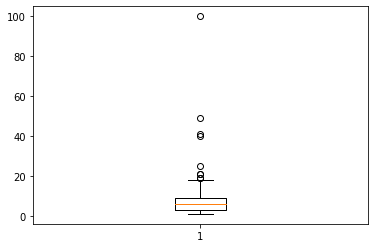

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.boxplot(num_friends)
plt.show()

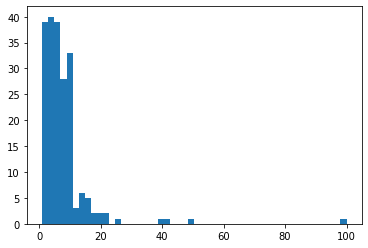

In [15]:
plt.hist(num_friends, bins=50)
plt.show()

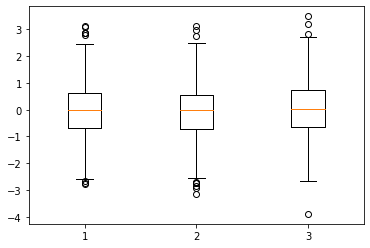

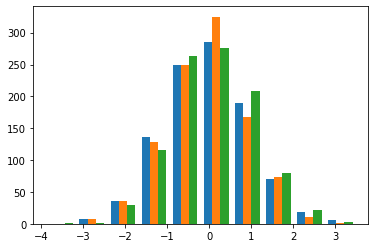

In [17]:
data = np.random.randn(1000,3)
plt.boxplot(data)
plt.show()
plt.hist(data, bins=10)
plt.show()

In [18]:
import numpy as np
print(np.std([1,2,3]))
print(np.std([1,2,3], ddof=1)) # provide degree of freedom
print(standard_deviation([1,2,3]))

0.816496580927726
1.0
1.0


In [19]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [20]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

In [21]:
print(covariance(num_friends, daily_minutes)) # 22.43
print(correlation(num_friends, daily_minutes)) # 0.25
# we may conclude that two variables are less correlated

22.425435139573064
0.24736957366478218


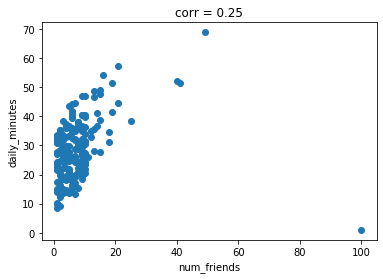

In [22]:
plt.scatter(num_friends, daily_minutes)
plt.xlabel('num_friends')
plt.ylabel('daily_minutes')
plt.title('corr = {:.2}'.format(correlation(num_friends, daily_minutes)))
plt.show()

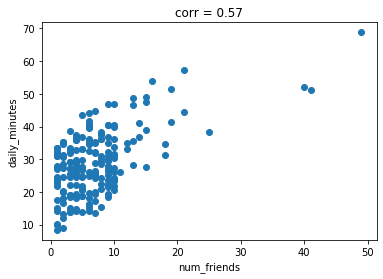

In [23]:
plt.scatter(num_friends[1:], daily_minutes[1:])
#plt.scatter(num_friends[4:], daily_minutes[4:])
plt.xlabel('num_friends')
plt.ylabel('daily_minutes')
plt.title('corr = {:.2}'.format(correlation(num_friends[1:], daily_minutes[1:])))
plt.show()

Correlation in Plain English

numpy version

In [24]:
num_friends = np.array(num_friends)
daily_minutes = np.array(daily_minutes)
data = np.array([num_friends, daily_minutes])
print(data.shape)
print()
print(np.cov(data))
print(np.corrcoef(data))
print()
print(np.corrcoef(data)[0,1])
print()
# print(np.var(num_friends, ddof=1))
# print(np.var(daily_minutes, ddof=1))
num_friends = list(num_friends)
daily_minutes = list(daily_minutes)

(2, 204)

[[ 81.54351396  22.42543514]
 [ 22.42543514 100.78589895]]
[[1.         0.24736957]
 [0.24736957 1.        ]]

0.247369573664782



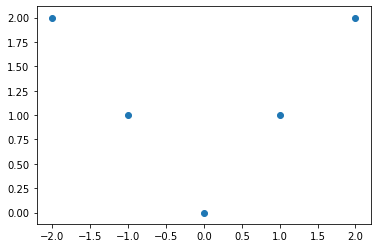

In [25]:
# absolute value relationship
x = [-2, -1, 0, 1, 2]
y = [ 2, 1, 0, 1, 2]
plt.scatter(x, y)
plt.show()

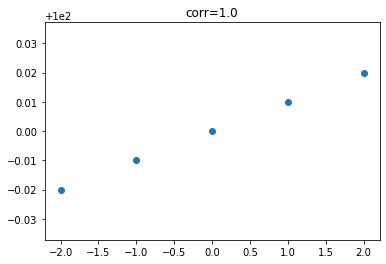

In [26]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]
plt.scatter(x, y)
plt.title('corr={:.2}'.format(correlation(x,y)))
plt.show()

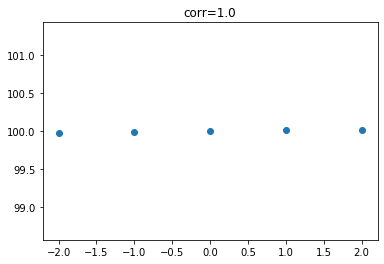

In [27]:
# Perfectly correlated. This relationship isn’t all that interesting.
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]
plt.scatter(x, y)
plt.axis('equal')
plt.title('corr={:.2}'.format(correlation(x,y)))
plt.show()